In [15]:
# system
import os
import importlib

# scipy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# nutrig
import nutrig.flt.template_FLT
from nutrig.flt.template_FLT import *

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

%matplotlib inline

In [11]:
plot_dir = '/pbs/home/p/pcorrea/grand/nutrig/plots'
savefig  = False

Load in background and signal datasets

In [12]:
bkg_train_file = '/sps/grand/pcorrea/nutrig/database/bkg/bkg_dataset_nutrig_gp13_train_seed_300.npz'

with np.load(bkg_train_file) as f:
    bkg_traces        = f['traces']
    bkg_pretrig_flags = f['pretrig_flags']
    bkg_pretrig_times = f['pretrig_times']

sig_train_file = '/sps/grand/pcorrea/nutrig/database/sig/sig_dataset_nutrig_gp13_train_seed_300.npz'

with np.load(sig_train_file) as f:
    sig_traces          = f['traces']
    sig_snr             = f['snr']
    sig_inj_pulse_times = f['inj_pulse_times']
    sig_pretrig_flags   = f['pretrig_flags']
    sig_pretrig_times   = f['pretrig_times']

[11.75635998  7.8674011  11.70538338]


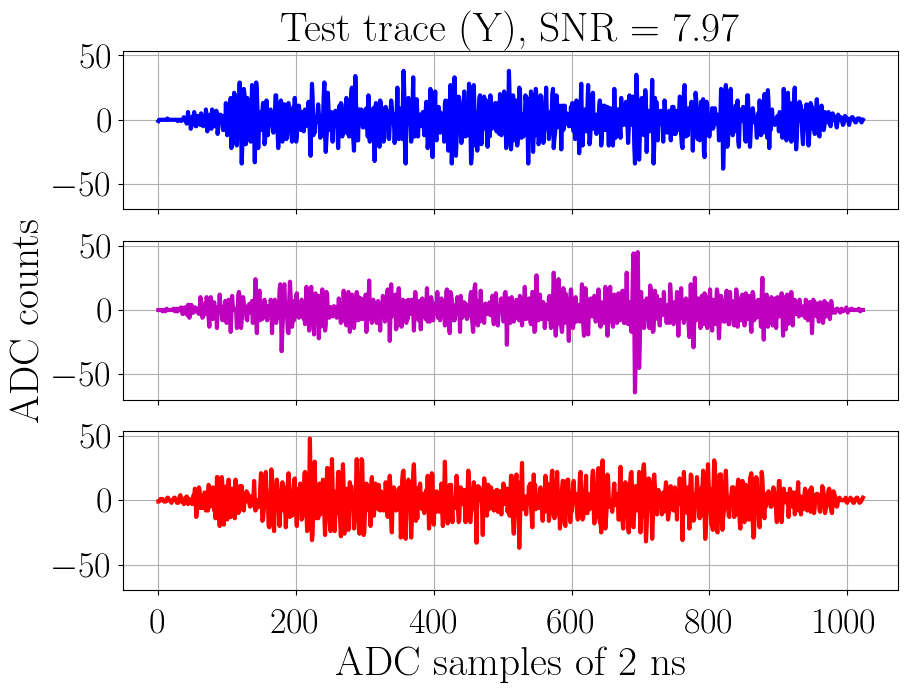

In [14]:
idx_sig_test_trace = 4800
sig_test_trace     = sig_traces[idx_sig_test_trace]
t0_test_trace      = sig_pretrig_times[idx_sig_test_trace]
snr_test_trace     = sig_snr[idx_sig_test_trace]
max_trace          = np.max(np.abs(sig_test_trace),axis=1)
print(np.sqrt(np.mean(sig_test_trace[:,:500]**2,axis=1)))

pol = ['X','Y','Z']

if sig_pretrig_flags[idx_sig_test_trace] == 1:
    pol_idx = 0
elif sig_pretrig_flags[idx_sig_test_trace] == 2:
    pol_idx = 1
else:
    pol_idx = np.argmax(max_trace[:2])



fig, ax = plt.subplots(3,1,sharex=True,sharey=True)

ax[0].plot(sig_test_trace[0],color='b')
ax[1].plot(sig_test_trace[1],color='m')
ax[2].plot(sig_test_trace[2],color='r')

#ax.set_xlim([370,470])

title = 'Test trace ({}), SNR = {:.2f}'.format(pol[pol_idx],snr_test_trace)
ax[0].set_title(title)

ax[2].set_xlabel('ADC samples of 2 ns')
ax[1].set_ylabel('ADC counts')

plt.show()

In [16]:
importlib.reload(nutrig.flt.template_FLT)

template_dir = '/sps/grand/pcorrea/nutrig/template/lib/'
n_templates  = (96,96,94)
rf_chain     = 'rfv2'

FLT = TemplateFLT3D()
FLT.FLT_X.load_templates(template_dir,n_templates[0],rf_chain)

AttributeError: 'TemplateFLT3D' object has no attribute 'load_templates'

In [16]:
FLT.template_fit(sig_test_trace,t0_test_trace)

NameError: name 'sig_test_trace' is not defined

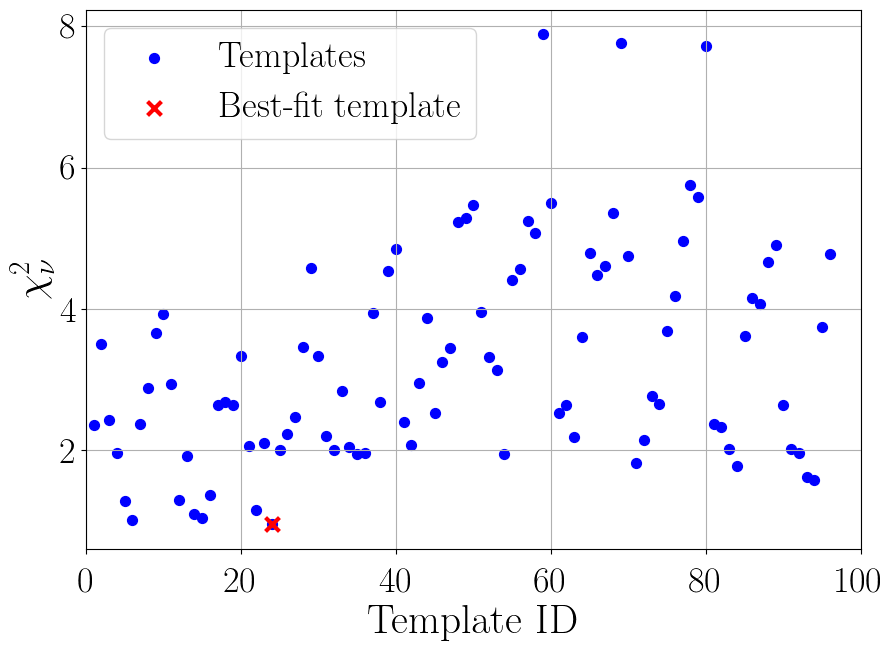

In [14]:
template_id = np.arange(len(FLT.FLT_X.templates)) + 1
plt.scatter(template_id,FLT.FLT_X.chi2,marker='o',color='b',label='Templates',s=50)
plt.scatter(FLT.FLT_X.idx_template_best_fit+1,FLT.FLT_X.chi2[FLT.FLT_X.idx_template_best_fit],marker='x',s=100,color='r',label='Best-fit template')
plt.xlim([0,100])
plt.xlabel('Template ID')
plt.ylabel(r'$\chi_\nu^2$')
#plt.text(3,108,'GRAND preliminary', color='crimson')
plt.legend(frameon=True,framealpha=.8)

if savefig:
    plot_name = 'template_fit_chi2'
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

In [10]:
f = np.load('/sps/grand/pcorrea/nutrig/template/results/results_template_FLT_XY_bkg_dataset_nutrig_gp13_train_seed_300_templates_96_cw_-15_15_fw_-10_15.npz')

f['ts'][:100]

array([[ 0.65041244, -0.1417741 ],
       [ 0.4955891 , -0.19841694],
       [-0.16063693,  0.88131698],
       [ 0.38715615,  0.72047432],
       [ 0.2959807 ,  0.57740668],
       [ 0.44271526,  0.55864803],
       [-0.12084064,  0.65437354],
       [ 0.50862677,  0.10499067],
       [ 0.43888683,  0.69309035],
       [ 0.78185784, -0.00125305],
       [ 0.24714285,  0.52035747],
       [ 0.05542642,  0.58191121],
       [-0.1912309 ,  0.69106488],
       [ 0.67988202,  0.23651536],
       [ 0.17512915,  0.6151224 ],
       [-0.2586235 ,  0.76794966],
       [-0.00262335,  0.87860264],
       [ 0.76070262,  0.17156813],
       [ 0.1705443 ,  0.74218104],
       [ 0.11779034,  0.72424668],
       [ 0.30784045,  0.73235728],
       [ 0.52185648,  0.23840953],
       [ 0.76687128,  0.12785068],
       [ 0.70660107,  0.60921876],
       [ 0.55492582,  0.51373748],
       [ 0.83118868,  0.35376626],
       [ 0.67487005,  0.2509817 ],
       [ 0.4186185 , -0.91971377],
       [ 0.53127453,